## Create heatmaps of feature tables

**Author**: Madeleine Ernst (mernst@ucsd.edu) <br>
**Edited by**: - <br>
**Use case**: Create heatmaps of overall and annotated features across different samples. <br>
**Input file format**: <br>
<ul>
<li>**Feature table with metadata** (.csv) table with samples in rows and metadata as well as features in columns. </li>
<li>**GNPS library matches** (.tsv) table retrieved from GNPS within the DB_result output folder.</li>
</ul>
**Outputs**: Heatmaps with overall and only annotated features selected <br>
**Dependencies**: R version 3.3.3 (2017-03-06) and libraries RColorBrewer_1.1-2 and gplots_3.0.1  

In [1]:
mylib <- '~/Rlib'

if (!dir.exists(mylib)){
    dir.create(mylib)
}
library(gplots, lib.loc = mylib)
library(RColorBrewer, lib.loc = mylib)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



read feature table with metadata file

In [2]:
data <- read.csv("FeatureTable_G5_tea_Clean.csv", header=TRUE, stringsAsFactors=F,row.names=1)
data[1:5,1:5]

,additives,additives_specific,age,age_units,animal_product_substitute
G90285_1x_BA9_01_31155.mzXML,not applicable,not applicable,1,minute,no
G90286_1x_RH6_01_31136.mzXML,not applicable,not applicable,0.5,minute,no
G90287_1x_RC12_01_31079.mzXML,not applicable,not applicable,1,minute,no
G90288_1x_BC2_01_31173.mzXML,not applicable,not applicable,0.5,minute,no
G90289_1x_BA3_01_31149.mzXML,not applicable,not applicable,0.5,minute,no


read GNPS library matches

In [3]:
db <- read.csv("0495ec3ef9a24b26abc20358e582b477.tsv",sep="\t",quote="")
head(db)

X.Scan.,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,⋯,RT_Query,SharedPeaks,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags
1,[M+H]+,58-08-2,1,Massbank:FIO00570 Caffeine,Isolated,Massbank,0.000,spectra/specs_ms.mgf1,"1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3",⋯,0,5,Cn(c2)c(C(=O)1)c(n2)N(C)C(=O)N(C)1,1,195.088,spectra/specs_ms.mgf,CCMSLIB00000214467,354997,UPDATE-SINGLE-ANNOTATED-BRONZE,
1020,M-H-H2O,495783,1,3-(2-Hydroxyphenyl)propionic acid,Isolated,NIST,0.000,spectra/specs_ms.mgf1020,"InChI=1S/C9H10O3/c10-8-4-2-1-3-7(8)5-6-9(11)12/h1-4,10H,5-6H2,(H,11,12)",⋯,0,4,C1=CC=C(C(=C1)CCC(=O)O)O,1,147.044,spectra/specs_ms.mgf,CCMSLIB00003653401,1931,UPDATE-SINGLE-ANNOTATED-BRONZE,
1043,M+H,,1,quercetin-3-O-glc-1-3-rham-1-6-glucoside,Isolated,TJ Ling,772.206,spectra/specs_ms.mgf1043,"InChI=1S/C33H40O21/c1-9-19(39)29(53-32-25(45)23(43)20(40)16(7-34)51-32)27(47)31(49-9)48-8-17-21(41)24(44)26(46)33(52-17)54-30-22(42)18-14(38)5-11(35)6-15(18)50-28(30)10-2-3-12(36)13(37)4-10/h2-6,9,16-17,19-21,23-27,29,31-41,43-47H,7-8H2,1H3/t9-,16+,17+,19-,20+,21+,23-,24-,25+,26+,27+,29+,31+,32-,33-/m0/s1",⋯,0,12,O=C1C2=C(O)C=C(O)C=C2OC(C3=CC(O)=C(O)C=C3)=C1O[C@@H]4O[C@H](CO[C@H]5[C@H](O)[C@H](O[C@@H]6O[C@H](CO)[C@@H](O)[C@H](O)[C@H]6O)[C@@H](O)[C@H](C)O5)[C@@H](O)[C@H](O)[C@H]4O,1,773.213,spectra/specs_ms.mgf,CCMSLIB00000578397,371625,UPDATE-SINGLE-ANNOTATED-BRONZE,
1047,M+H,n/a,1,"NCGC00385832-01!5,7-dihydroxy-3-(4-hydroxyphenyl)-6,8-bis[3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]chromen-4-one",isolated,lfnothias,594.158,spectra/specs_ms.mgf1047,"InChI=1S/C27H30O15/c28-5-11-17(32)21(36)23(38)26(41-11)14-19(34)13-16(31)10(8-1-3-9(30)4-2-8)7-40-25(13)15(20(14)35)27-24(39)22(37)18(33)12(6-29)42-27/h1-4,7,11-12,17-18,21-24,26-30,32-39H,5-6H2",⋯,0,19,OCC1OC(C(O)C(O)C1O)C2=C(O)C(C3OC(CO)C(O)C(O)C3O)=C4OC=C(C(=O)C4=C2O)C5=CC=C(O)C=C5,1,595.165,spectra/specs_ms.mgf,CCMSLIB00000848161,69107,UPDATE-SINGLE-ANNOTATED-GOLD,
1049,[M+H]+,17353-03-6,1,Massbank:FIO00172 Kaempferol-7-neohesperidoside,Isolated,Massbank,0.000,spectra/specs_ms.mgf1049,"1S/C27H30O15/c1-9-17(31)20(34)23(37)26(38-9)42-25-21(35)18(32)15(8-28)41-27(25)39-12-6-13(30)16-14(7-12)40-24(22(36)19(16)33)10-2-4-11(29)5-3-10/h2-7,9,15,17-18,20-21,23,25-32,34-37H,8H2,1H3/t9-,15+,17-,18+,20+,21-,23+,25+,26-,27+/m0/s1",⋯,0,5,O([C@H]5C)[C@H]([C@@H]([C@@H]([C@H]5O)O)O)O[C@H]([C@H]4O)[C@@H](O[C@@H]([C@H]4O)CO)Oc(c3)cc(O1)c(c3O)C(C(=C(c(c2)ccc(O)c2)1)O)=O,1,595.165,spectra/specs_ms.mgf,CCMSLIB00000213826,594178,UPDATE-SINGLE-ANNOTATED-BRONZE,
1051,M+H,4670057,1,Theaflavin,Isolated,NIST,0.000,spectra/specs_ms.mgf1051,"InChI=1S/C29H24O12/c30-11-3-17(32)15-8-21(36)28(40-23(15)5-11)10-1-13-14(7-20(35)27(39)25(13)26(38)19(34)2-10)29-22(37)9-16-18(33)4-12(31)6-24(16)41-29/h1-7,21-22,28-33,35-37,39H,8-9H2,(H,34,38)/t21-,22-,28-,29-/m1/s1",⋯,0,16,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=O)C(=C4C(=C3)C(=CC(=C4O)O)C5C(CC6=C(C=C(C=C6O5)O)O)O)O)O,1,565.134,spectra/specs_ms.mgf,CCMSLIB00003376813,77293,UPDATE-SINGLE-ANNOTATED-BRONZE,


how many metadata columns are there? (here 141)

In [4]:
nonfeatures <- c(1:141)

In [5]:
# Normalize the features by TIC and adding 1 to all feature intensities 
tab2 <- data
tab2[,-nonfeatures] <- t(apply(tab2[,-nonfeatures], 1, function(x) (x+1)/sum((x+1))))
colnames(tab2)[-nonfeatures] <- gsub("X","",colnames(tab2)[-nonfeatures])
tab2$age <- as.numeric(tab2$age)

tab2 <- tab2[with(tab2, order(tea_type, age)), ]
tab2$age[which(is.na(tab2$age))] <- "solid"
tab2 <- tab2[-which(tab2$tea_type=="not applicable"),] 
ft <- tab2[,c((length(nonfeatures)+1):ncol(tab2))]
my_palette <- colorRampPalette(c("blue","white","red"))(n = 15) 

tab2$type_age <- paste(tab2$tea_type,tab2$age,sep="_")
colpal <- c(brewer.pal(5, "Greys"),brewer.pal(5, "Greens"),brewer.pal(5, "YlGn"),brewer.pal(5, "YlOrBr"),brewer.pal(5, "Reds"),brewer.pal(5, "Blues"))

Rowside_species <- tab2$type_age
Rowside_cols <- colpal[as.numeric(as.factor(Rowside_species))]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

plot heatmap

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

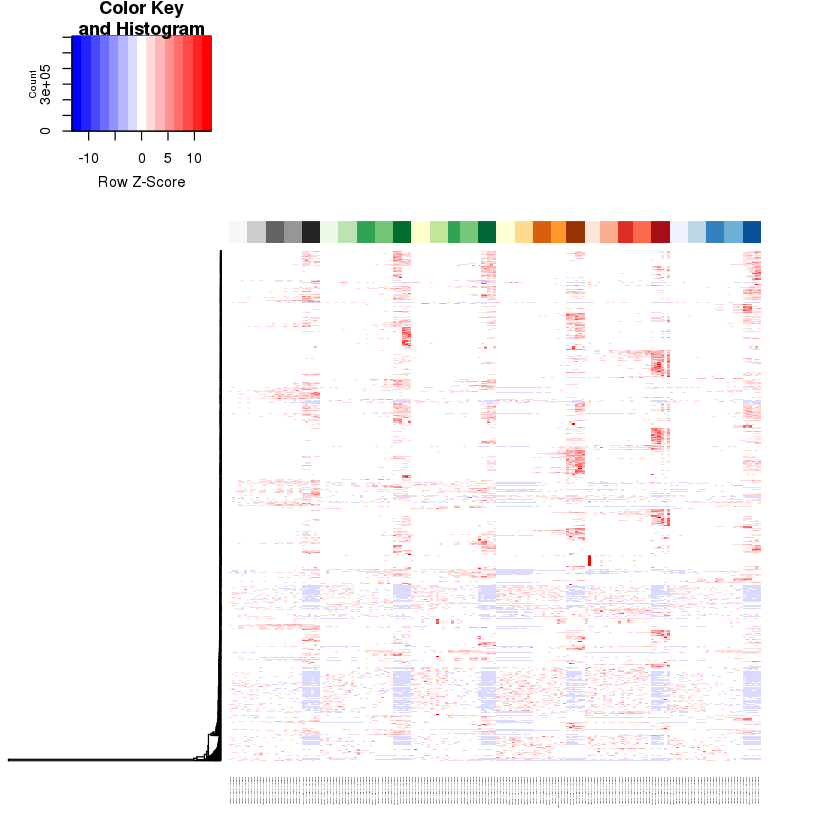

In [6]:
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols,labRow = FALSE)

save heatmap to pdf

In [7]:
pdf(file="Tea_HeatMap_RowScaled_WithNames.pdf", width=11, height=80)
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols) #,labRow = FALSE
dev.off()

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

png 
  2

### create heatmaps with only annotated features

In [9]:
f_ids <- unlist(lapply(strsplit(colnames(tab2)[(length(nonfeatures)+1):ncol(tab2)],split="_"), `[[`, 1))

tab2 <- tab2[,c(nonfeatures,which(f_ids %in% db$X.Scan.)+length(nonfeatures))]
colnames(tab2)[(length(nonfeatures)+1):ncol(tab2)] <- as.character(db$Compound_Name[which(db$X.Scan. %in% f_ids)])

ft <- tab2[,c((length(nonfeatures)+1):ncol(tab2))]

plot heatmap

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

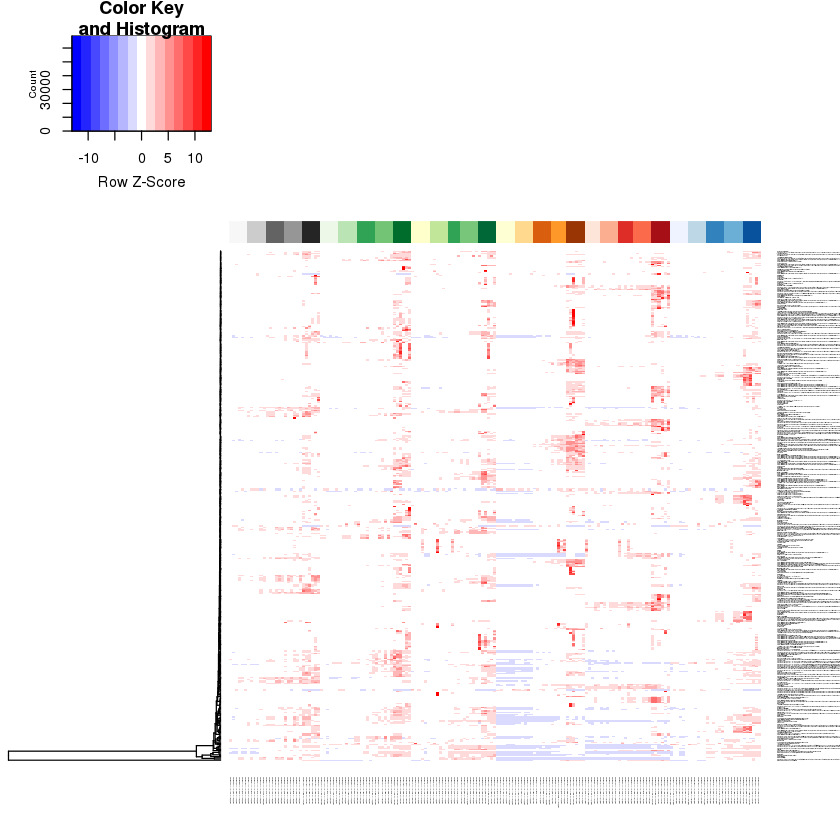

In [11]:
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols) #

save heatmap to pdf

In [13]:
pdf(file="Tea_HeatMap_RowScaled_Annotated_CompoundNames.pdf", width=11, height=9)
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols) #
dev.off()

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

png 
  2